In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img,cmap="gray")

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

# 21.1 理论基础

In [5]:
# 支持向量机（SVM）：一种而分类模型，目标是寻找一个标准（超平面）对样本数据进行分割，分割的原则是确保分类最优化（类别间间距最大）
# 数据集较小时，支持向量机进行分类非常有效，且分类其不加修改就可直接使用
# 支持向量机把无法线性分割的数据映射到高维空间，然后在高维空间找到分类最优的线性分类器

# 1.分类：
# 2.分类器：
# 用于划分不同类别的直线就是分类器。找到离分类器最近的点，确保它们离分类器尽可能远，就找到了最优分类器，离分类器最近的那些点叫做支持向量
# 3.将不可分变为可分：
# 将低维空间通过映射到高维空间，实现线性可分
# 4.概念总结：
# 虽然分析是二维的，但支持向量机可以处理任何维度的数据，在不同维度下，支持向量机会尽可能找到类似二维空间的直线的线性分类器：
# 如二维空间会找到一条直线，三位空间会找到一个平面，更高维空间会找到一个超平面

# 21.2 SVM案例

In [6]:
# 1.使用支持向量机模块时，需要先用函数cv2.ml.SVM_create()生成一个用于后续训练的空分类模型：
# svm = cv2.ml.SVM_create()

# 2.然后用该模型使用svm.train()函数对训练数据进行训练：
# 训练结果 = cv2.ml.SVM_create(训练数据，训练数据排列格式，训练数据的标签)
# 训练数据排列格式：原始数据的排列格式有按行排列cv2.ml.ROW_SAMPLE（一条数据占一行）和案列排列cv2.ml.COL_SAMPLE(一条数据占一列)

# 3.完成训练后，使用svm.predict()使用训练好的分类模型对测试数据进行分类：
# （返回值，返回结果） = svm.predict(测试数据)

# 实际使用过程中，可对其中参数进行调整。
# 如通过setType()函数设置类别，通过setKernel()函数设置核类型，通过setC()函数设置支持向量机的参数C(惩罚系数，即对误差宽容度，默认0)

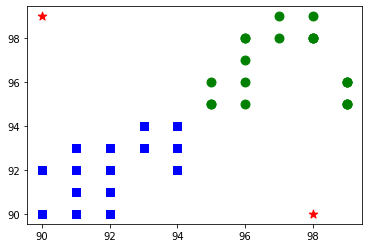

[[98. 90.]
 [90. 99.]]
[[1.]
 [1.]]


In [16]:
# 已知老员工的笔试成绩，面试成绩及对应的等级表现，根据新入职员工的笔试成绩，面试成绩预测其可能表现

# 1.生成模拟数据
a = np.random.randint(95,100,(20,2)).astype(np.float32)  # 入职1年的A员工入职时的笔试成绩，1年后工作表现为A级
b = np.random.randint(90,95,(20,2)).astype(np.float32)  # 入职1年的B员工入职时的笔试成绩，1年后工作表现为B级
data = np.vstack((a,b))
data = np.array(data,dtype=np.float32)

# 2.构造数据标签
aLabel = np.zeros((20,1))
bLabel = np.ones((20,1))
label = np.vstack((aLabel,bLabel))
label = np.array(label,dtype=np.int32)

# 训练
svm = cv2.ml.SVM_create()
# 属性设置，采用默认值即可
# svm.setType(cv2.ml.SVM_C_SVC)
# svm.setKernel(cv2.ml.SVM_LINEAR)
# svm.setC(0.01)
result = svm.train(data,cv2.ml.ROW_SAMPLE,label)

# 4.分类
test = np.vstack([[98,90],[90,99]])  # 生成两组（笔试成绩，面试成绩）用于测试
test = np.array(test,np.float32)
(p1,p2) = svm.predict(test)

# 显示分类结果
plt.scatter(a[:,0],a[:,1],80,'g','o')
plt.scatter(b[:,0],b[:,1],80,'b','s')
plt.scatter(test[:,0],test[:,1],80,'r','*')
plt.show()

print(test)
print(p2)